About Dataset
Breast Cancer Data Set

570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant

Our cancer data contains 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

In [ ]:
#import packages
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#load data
df_cancer = pd.read_csv("/content/Cancer_Data.csv")
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# will check null data missing
df_cancer.isnull().sum(axis=0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#will drop it columns "Unnamed: 32" and 'id'

df_cancer = df_cancer.drop(columns=['Unnamed: 32', 'id'])

In [ ]:
#print information
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
def encode_label(series):
    le = LabelEncoder()
    return le.fit_transform(series)

df_cancer['diagnosis'] = encode_label(df_cancer['diagnosis'])

In [ ]:
df_cancer['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Benign cancer (B) -> 0

Malignant cancer (M) ->1

In [ ]:
# Filter and print correlations greater than 0.5 with the target variable directly
print(df_cancer.corr()['diagnosis'][df_cancer.corr()['diagnosis'] > 0.5])

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64


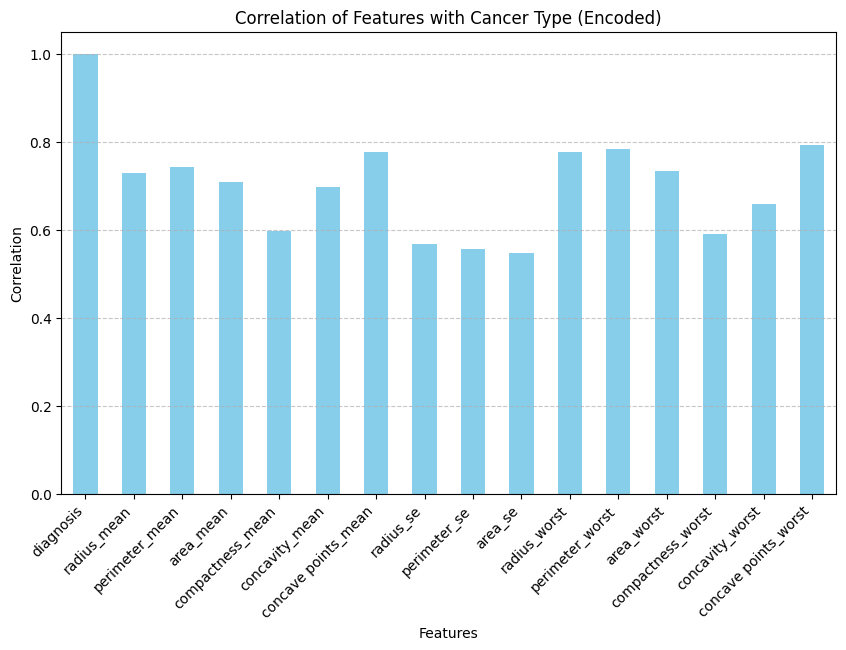

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size
df_cancer.corr()['diagnosis'][df_cancer.corr()['diagnosis'] > 0.5].plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Cancer Type (Encoded)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate and filter the correlation of features with the target variable
corr_target_best = df_cancer.corr()['diagnosis'][df_cancer.corr()['diagnosis'] > 0.5].index.tolist()

print("len columns:", len(corr_target_best))
print("name columns:", corr_target_best)

len columns: 16
name columns: ['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [ ]:
df_cancer_new= df_cancer[corr_target_best]
df_cancer_new.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [ ]:
X, y = df_cancer_new.drop(columns='diagnosis'), df_cancer_new['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the training and testing sets
print("Training set (features):", X_train.shape)
print("Testing set (features):", X_test.shape)
print("Training set (target):", y_train.shape)
print("Testing set (target):", y_test.shape)

Training set (features): (455, 15)
Testing set (features): (114, 15)
Training set (target): (455,)
Testing set (target): (114,)


In [ ]:
def plot_history(history):
    # Extract values
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/100
46/46 [==============================] - 1s 9ms/step - loss: 40.8040 - accuracy: 0.6681 - val_loss: 1.4779 - val_accuracy: 0.8947
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5502 - accuracy: 0.7912 - val_loss: 1.2473 - val_accuracy: 0.8772
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5555 - accuracy: 0.8330 - val_loss: 1.2758 - val_accuracy: 0.8509
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 2.3438 - accuracy: 0.8396 - val_loss: 1.0973 - val_accuracy: 0.9123
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 2.1999 - accuracy: 0.8527 - val_loss: 1.0315 - val_accuracy: 0.9298
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0998 - accuracy: 0.8725 - val_loss: 1.0014 - val_accuracy: 0.9298
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 1.9917 - accuracy: 0.8769 - val_loss: 0.9459 - val_accuracy: 0.9298
Epoch 8/100


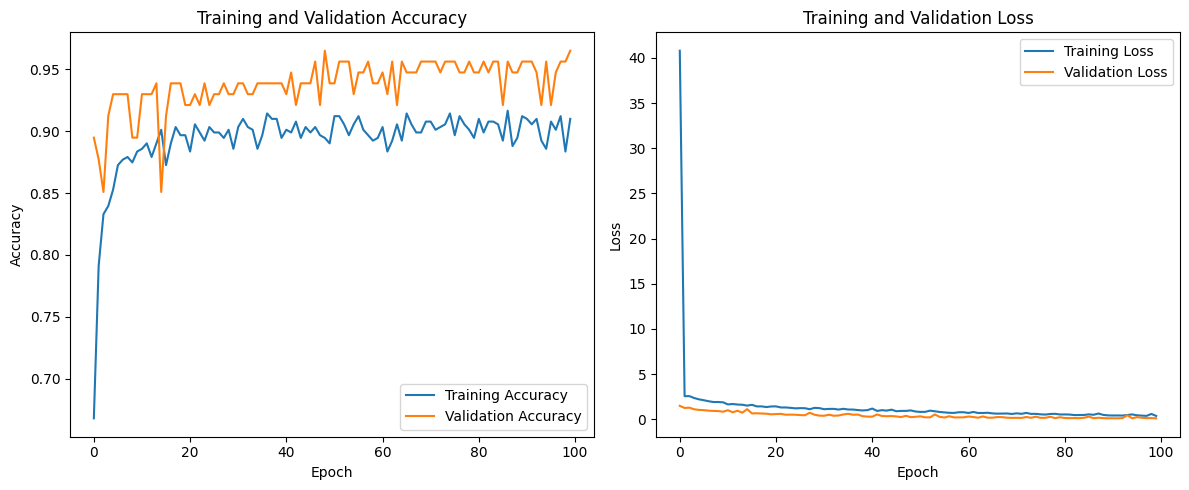

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 128       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(15,)),  # Input layer with 8 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))  # Train the model for 100 epochs with a batch size of 10

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
#plot
plot_history(history)
model.summary()

Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 1.7924 - accuracy: 0.6857 - val_loss: 0.5404 - val_accuracy: 0.7281
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8835 - val_loss: 0.2494 - val_accuracy: 0.8947
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8945 - val_loss: 0.1929 - val_accuracy: 0.9386
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2772 - accuracy: 0.9121 - val_loss: 0.1651 - val_accuracy: 0.9386
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9099 - val_loss: 0.1691 - val_accuracy: 0.9474
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8549 - val_loss: 0.1354 - val_accuracy: 0.9474
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.9099 - val_loss: 0.1242 - val_accuracy: 0.9474
Epoch 8/100
4

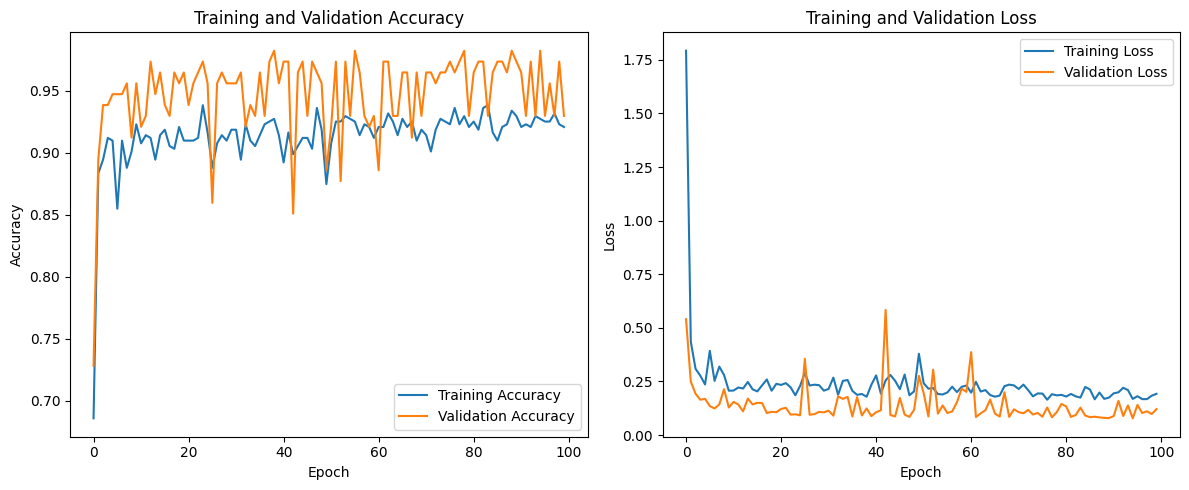

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                512       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(15,)),  # Input layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation='relu'),  # Input layer with 8 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))  # Train the model for 100 epochs with a batch size of 10

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
#plot
plot_history(history)
model.summary()

Add layers and neurons

In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),  # Input layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))  # Train the model for 100 epochs with a batch size of 10

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 18.1792 - accuracy: 0.5297 - val_loss: 1.2067 - val_accuracy: 0.7281
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1563 - accuracy: 0.8132 - val_loss: 0.2679 - val_accuracy: 0.9211
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5074 - accuracy: 0.7341 - val_loss: 2.9829 - val_accuracy: 0.8070
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2750 - accuracy: 0.8418 - val_loss: 1.8254 - val_accuracy: 0.6842
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9337 - accuracy: 0.8484 - val_loss: 1.8897 - val_accuracy: 0.6579
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0441 - accuracy: 0.8549 - val_loss: 0.6879 - val_accuracy: 0.8246
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.8967 - val_loss: 0.1161 - val_accuracy: 0.9561
Epoch 8/100


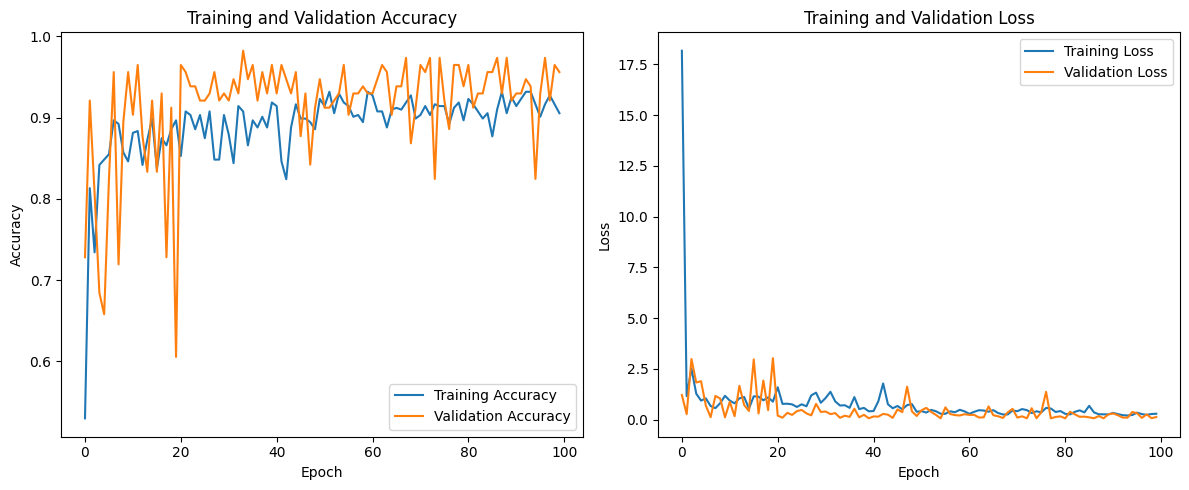

In [ ]:
#plot
plot_history(history)

add EarlyStopping

In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),  # Input layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 11.5794 - accuracy: 0.5648 - val_loss: 1.6995 - val_accuracy: 0.7018
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 1.1537 - accuracy: 0.8549 - val_loss: 0.3756 - val_accuracy: 0.9386
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.8813 - val_loss: 0.1149 - val_accuracy: 0.9561
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.8681 - val_loss: 0.1346 - val_accuracy: 0.9474
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.5647 - accuracy: 0.8703 - val_loss: 0.1581 - val_accuracy: 0.9474
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1149 - accuracy: 0.9561
Test Loss: 0.1149224117398262
Test Accuracy: 0.9561403393745422
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape    

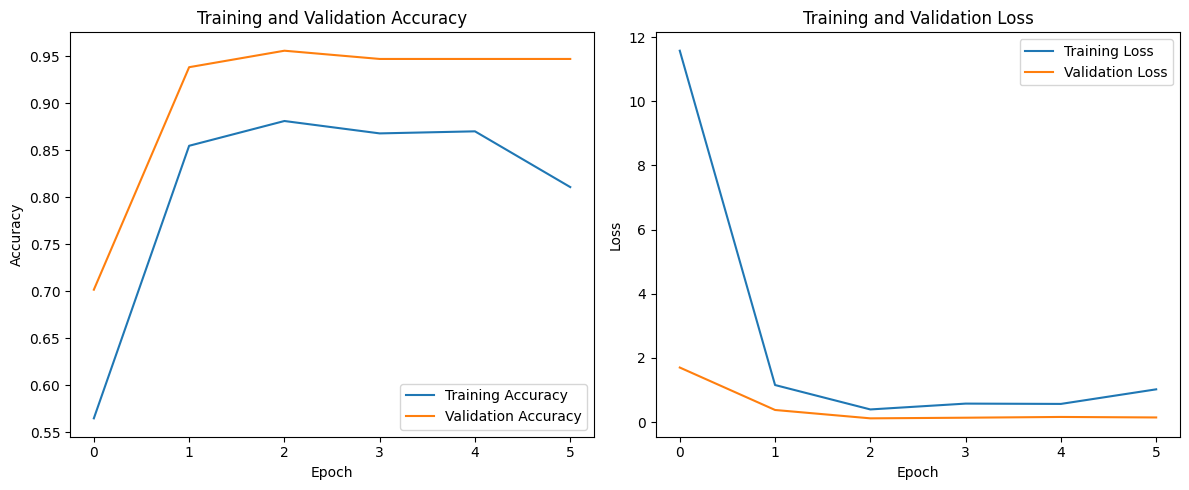

In [ ]:
plot_history(history)

add ReduceLROnPlateau

reduces the learning rate when validation loss has stopped improving.


In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),  # Input layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Callback setup: ReduceLROnPlateau
reduce_le = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', min_lr=0.00001)  # Reduce learning rate on plateau to optimize training

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_le])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 2s 16ms/step - loss: 4.7095 - accuracy: 0.6901 - val_loss: 0.2495 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.8835 - val_loss: 0.8720 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7250 - accuracy: 0.8637 - val_loss: 0.7733 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.9298
Test Loss: 0.2494562417268753
Test Accuracy: 0.9298245906829834
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               2048      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                        

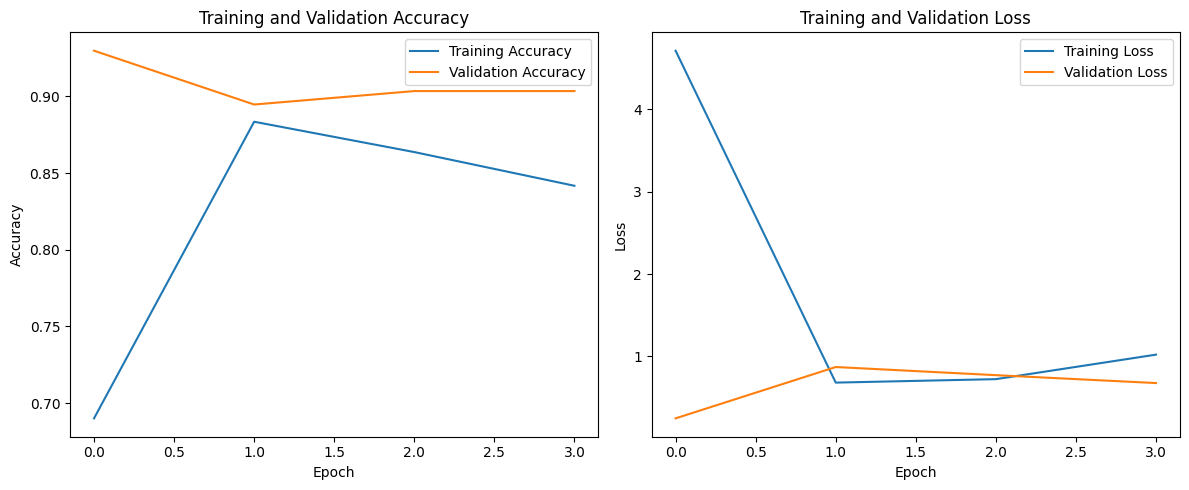

In [ ]:
plot_history(history)

ADD Dropout

In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),  # Input layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 20% to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Callback setup: ReduceLROnPlateau
reduce_le = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', min_lr=0.00001)  # Reduce learning rate on plateau to optimize training

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_le])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 21.5448 - accuracy: 0.5143 - val_loss: 1.2952 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 4.8991 - accuracy: 0.7451 - val_loss: 0.5305 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8791 - accuracy: 0.8000 - val_loss: 0.3202 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3986 - accuracy: 0.7978 - val_loss: 0.2860 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.8484 - val_loss: 0.1719 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8505 - val_loss: 0.1656 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.

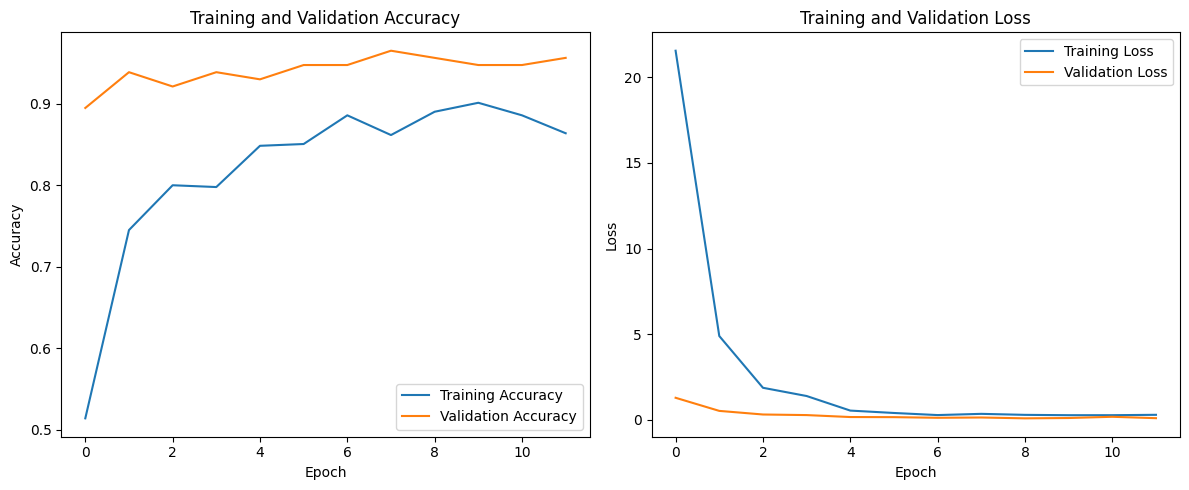

In [ ]:
plot_history(history)

add BatchNormalization

In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),  # Input layer with 128 neurons and ReLU activation function
    tf.keras.layers.BatchNormalization(), ## BatchNormalization layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 20% to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Callback setup: ReduceLROnPlateau
reduce_le = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', min_lr=0.00001)  # Reduce learning rate on plateau to optimize training

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_le])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 0.3271 - accuracy: 0.8659 - val_loss: 0.9814 - val_accuracy: 0.4386 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2783 - accuracy: 0.8945 - val_loss: 0.3094 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8725 - val_loss: 0.1800 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.8901 - val_loss: 0.1304 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.8769 - val_loss: 0.1591 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2499 - accuracy: 0.9055 - val_loss: 0.1262 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2

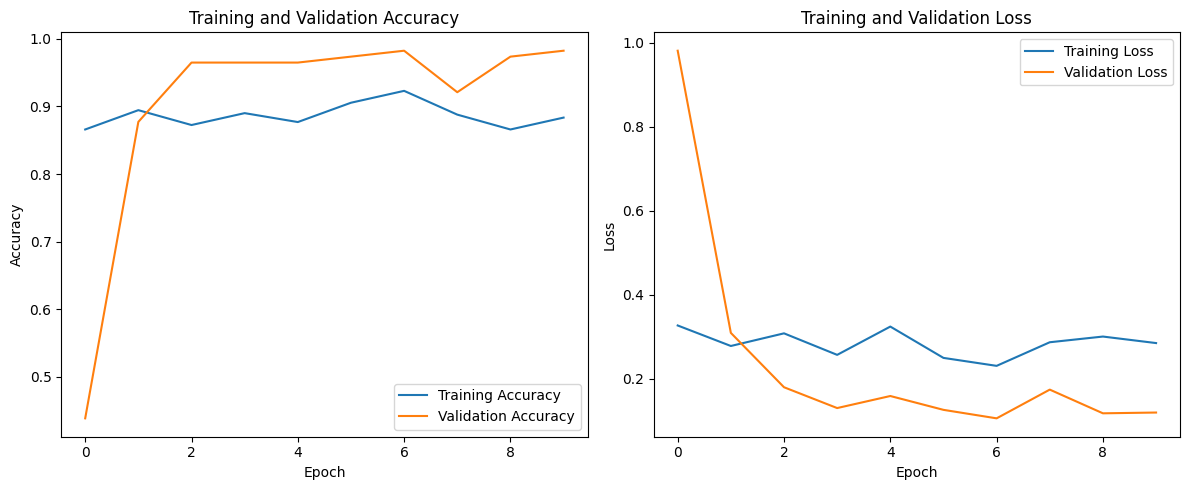

In [ ]:
plot_history(history)

Finally the optimum model structure:

In [ ]:
# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(15,), kernel_initializer='he_normal'),  # Input layer with 128 neurons
    tf.keras.layers.BatchNormalization(),  # BatchNormalization layer
    tf.keras.layers.Activation('relu'),  # ReLU activation function
    tf.keras.layers.Dense(64, kernel_initializer='he_normal'),  # Hidden layer with 64 neurons
    tf.keras.layers.BatchNormalization(),  # BatchNormalization layer
    tf.keras.layers.Activation('relu'),  # ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Callback setup: ReduceLROnPlateau
reduce_le = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', min_lr=0.00001)  # Reduce learning rate on plateau to optimize training

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_le])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.summary()

Epoch 1/100
46/46 [==============================] - 2s 9ms/step - loss: 0.3271 - accuracy: 0.8791 - val_loss: 1.3879 - val_accuracy: 0.3947 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.8703 - val_loss: 0.3769 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.8945 - val_loss: 0.2736 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8637 - val_loss: 0.1841 - val_accuracy: 0.9561 - lr: 0.0010
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.8835 - val_loss: 0.1426 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.8879 - val_loss: 0.1305 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2

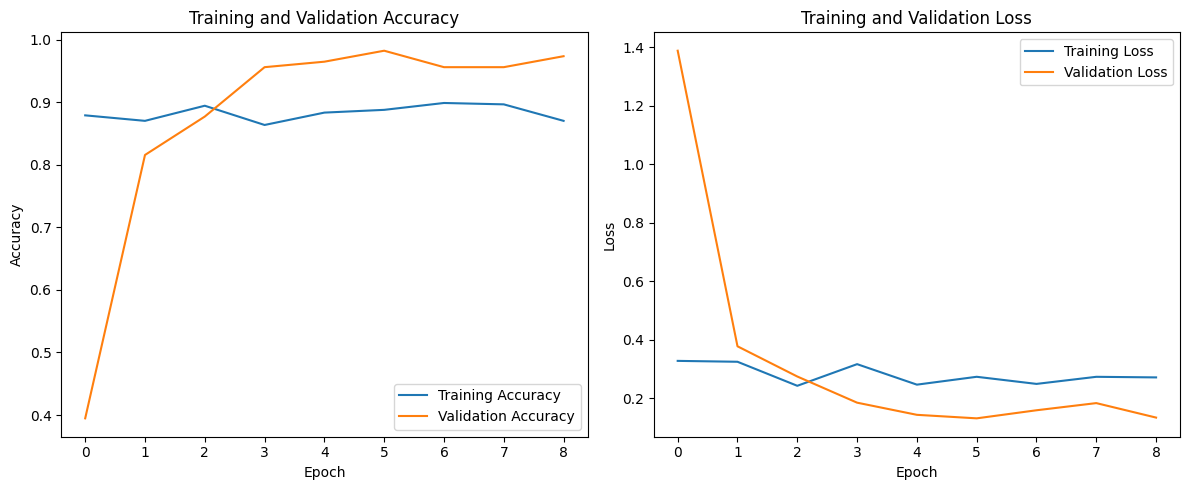

In [ ]:
plot_history(history)

In [ ]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               2048      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 64)               

Epoch 1/100
46/46 [==============================] - 2s 9ms/step - loss: 0.3763 - accuracy: 0.8484 - val_loss: 1.1222 - val_accuracy: 0.4035 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.8879 - val_loss: 0.4511 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.8659 - val_loss: 0.2235 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.8945 - val_loss: 0.1590 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8593 - val_loss: 0.1405 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.9011 - val_loss: 0.1264 - val_accuracy: 0.9561 - lr: 0.0010
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2

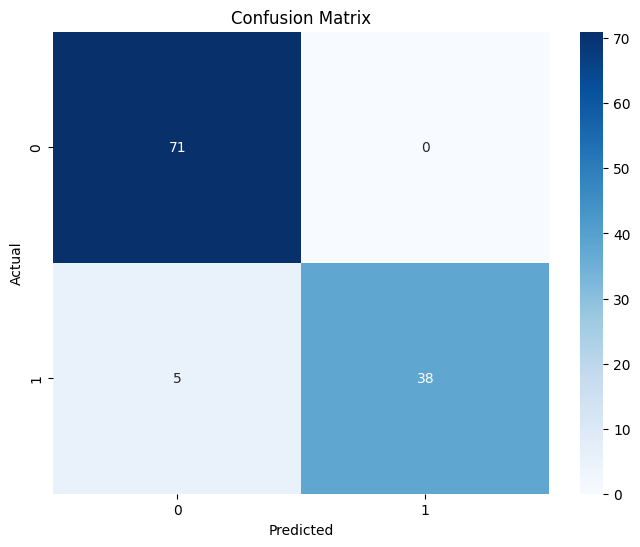

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               2048      
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 64)               

In [ ]:
###For confusion matrix and F1 Score
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Build model: Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(15,), kernel_initializer='he_normal'),  # Input layer with 128 neurons
    tf.keras.layers.BatchNormalization(),  # BatchNormalization layer
    tf.keras.layers.Activation('relu'),  # ReLU activation function
    tf.keras.layers.Dense(64, kernel_initializer='he_normal'),  # Hidden layer with 64 neurons
    tf.keras.layers.BatchNormalization(),  # BatchNormalization layer
    tf.keras.layers.Activation('relu'),  # ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation function
])

# Compile model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary cross-entropy loss function

# Callback setup: EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)  # Early stopping callback to prevent overfitting

# Callback setup: ReduceLROnPlateau
reduce_le = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', min_lr=0.00001)  # Reduce learning rate on plateau to optimize training

# Fit the model on training data and validate on test data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_le])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the trained model's performance on the test data

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model.summary()


In [ ]:
for layer in model.layers:
    print(f'Layer {layer.name}')
    print(f'  Input shape: {layer.input_shape}')
    print(f'  Output shape: {layer.output_shape}')

Layer dense_23
  Input shape: (None, 15)
  Output shape: (None, 128)
Layer batch_normalization_3
  Input shape: (None, 128)
  Output shape: (None, 128)
Layer activation_2
  Input shape: (None, 128)
  Output shape: (None, 128)
Layer dense_24
  Input shape: (None, 128)
  Output shape: (None, 64)
Layer batch_normalization_4
  Input shape: (None, 64)
  Output shape: (None, 64)
Layer activation_3
  Input shape: (None, 64)
  Output shape: (None, 64)
Layer dropout_3
  Input shape: (None, 64)
  Output shape: (None, 64)
Layer dense_25
  Input shape: (None, 64)
  Output shape: (None, 1)


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print results
print("SVM Test Accuracy:", accuracy_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Test Accuracy: 0.9736842105263158
SVM Confusion Matrix:
[[70  1]
 [ 2 41]]


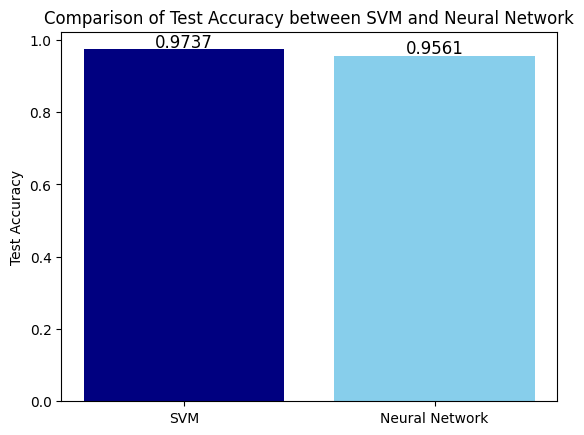

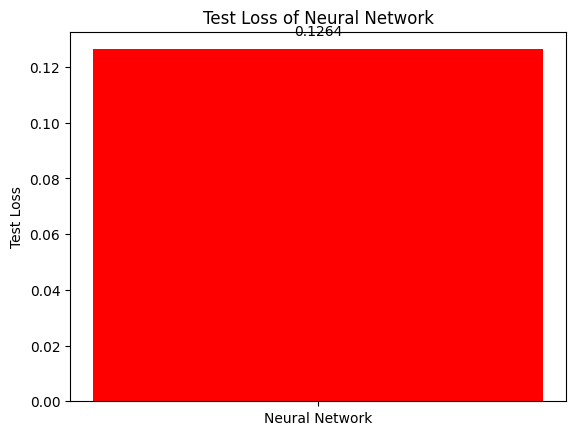

In [ ]:
import matplotlib.pyplot as plt

# Test accuracy values
svm_accuracy = accuracy_svm
nn_accuracy = accuracy

# Plotting test accuracy
plt.bar(['SVM', 'Neural Network'], [svm_accuracy, nn_accuracy], color=['navy', 'skyblue'])
plt.text(0, svm_accuracy + 0.005, str(round(svm_accuracy, 4)), ha='center', color='black', fontsize=12)
plt.text(1, nn_accuracy + 0.005, str(round(nn_accuracy, 4)), ha='center', color='black', fontsize=12)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy between SVM and Neural Network')

plt.show()

# Plotting test loss
plt.bar(['Neural Network'], [loss], color='red')
plt.text(0, loss + 0.005, str(round(loss, 4)), ha='center', color='black', fontsize=10)
plt.ylabel('Test Loss')
plt.title('Test Loss of Neural Network')

plt.show()
